# Projekt 6: Przewidywanie struktury drugorzędowej RNA

In [1]:
# %pip install matplotlib pandas seaborn

In [2]:
import os
import random
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


DATASET_DIR = Path("./resources/datasets")
MODELS_DIR = Path("./resources/models")
RESULTS_DIR = Path("./resources/results")
FIGURES_DIR = Path("./resources/figures")

In [3]:
def split_datasets(
    path: Path, train_ratio: float = 0.7, valid_ratio: float = 0.15, test_ratio: float = 0.15
) -> None:
    random.seed(42)
    files = [f"{path}/{f}" for f in os.listdir(path) if f.endswith(".bpseq")]
    random.shuffle(files)

    total_files = len(files)
    train_count = int(total_files * train_ratio)
    valid_count = int(total_files * valid_ratio)

    train_files = files[:train_count]
    valid_files = files[train_count : train_count + valid_count]
    test_files = files[train_count + valid_count :]

    with open(f"{path}-train-bpseq.lst", "w") as f:
        f.write("\n".join(train_files))
    with open(f"{path}-valid-bpseq.lst", "w") as f:
        f.write("\n".join(valid_files))
    with open(f"{path}-test-bpseq.lst", "w") as f:
        f.write("\n".join(test_files))

    with open(f"{path}-train-fa.lst", "w") as f:
        f.write("\n".join(train_files).replace(".bpseq", ".fa"))
    with open(f"{path}-valid-fa.lst", "w") as f:
        f.write("\n".join(valid_files).replace(".bpseq", ".fa"))
    with open(f"{path}-test-fa.lst", "w") as f:
        f.write("\n".join(test_files).replace(".bpseq", ".fa"))


def datasets_sanity_check() -> None:
    lst_files = [file for file in os.listdir(DATASET_DIR) if file.endswith(".lst")]

    for file in lst_files:
        file_path = DATASET_DIR / file
        with open(file_path, "r") as f:
            lines = f.readlines()
        num_lines = len(lines)

        total_files = len(os.listdir(DATASET_DIR / file.split("-")[0])) // 2
        print(f"{file:<25} has {round(num_lines/total_files * 100)}% files ({num_lines})")

In [4]:
split_datasets(DATASET_DIR / "ArchiveII")
split_datasets(DATASET_DIR / "PDB")
datasets_sanity_check()

ArchiveII-train-fa.lst    has 70% files (2779)
PDB-train-fa.lst          has 70% files (413)
ArchiveII-test-bpseq.lst  has 15% files (596)
ArchiveII-test-fa.lst     has 15% files (596)
ArchiveII-valid-fa.lst    has 15% files (595)
PDB-valid-fa.lst          has 15% files (88)
PDB-valid-bpseq.lst       has 15% files (88)
PDB-test-bpseq.lst        has 15% files (89)
ArchiveII-train-bpseq.lst has 70% files (2779)
PDB-test-fa.lst           has 15% files (89)
ArchiveII-valid-bpseq.lst has 15% files (595)
PDB-train-bpseq.lst       has 70% files (413)


## ArchiveII Dataset

In [5]:
NUMBER_OF_EPOCHS = 10

In [6]:
DATASET_NAME = "ArchiveII"
!mxfold2 train {DATASET_DIR}/{DATASET_NAME}-train-bpseq.lst --test-input {DATASET_DIR}/{DATASET_NAME}-valid-bpseq.lst \
    --param {MODELS_DIR}/{DATASET_NAME}-model.pth --save-config {MODELS_DIR}/{DATASET_NAME}-model.conf --epoch {NUMBER_OF_EPOCHS}

100%|█████████████████| 2779/2779 [07:13<00:00,  6.41it/s, train_loss=1.391e-01]
Train Epoch: 1	Loss: 0.139070	Time: 433.384s
100%|████████████████████| 595/595 [01:57<00:00,  5.06it/s, test_loss=1.363e-01]
Test Epoch: 1	Loss: 0.136262	Time: 117.639s
100%|█████████████████| 2779/2779 [07:18<00:00,  6.34it/s, train_loss=1.358e-01]
Train Epoch: 2	Loss: 0.135770	Time: 438.019s
100%|████████████████████| 595/595 [02:02<00:00,  4.86it/s, test_loss=1.336e-01]
Test Epoch: 2	Loss: 0.133605	Time: 122.430s
100%|█████████████████| 2779/2779 [07:18<00:00,  6.34it/s, train_loss=1.325e-01]
Train Epoch: 3	Loss: 0.132533	Time: 438.547s
100%|████████████████████| 595/595 [02:02<00:00,  4.86it/s, test_loss=1.310e-01]
Test Epoch: 3	Loss: 0.130950	Time: 122.524s
100%|█████████████████| 2779/2779 [07:16<00:00,  6.37it/s, train_loss=1.293e-01]
Train Epoch: 4	Loss: 0.129295	Time: 436.352s
100%|████████████████████| 595/595 [02:00<00:00,  4.96it/s, test_loss=1.282e-01]
Test Epoch: 4	Loss: 0.128228	Time: 120.0

In [7]:
DATASET_NAME = "ArchiveII"
!mxfold2 predict {DATASET_DIR}/{DATASET_NAME}-test-bpseq.lst --param {MODELS_DIR}/{DATASET_NAME}-model.pth \
    --bpseq {RESULTS_DIR}/{DATASET_NAME} --result {RESULTS_DIR}/{DATASET_NAME}-results.csv

## PDB Dataset

In [8]:
DATASET_NAME = "PDB"
!mxfold2 train {DATASET_DIR}/{DATASET_NAME}-train-bpseq.lst --test-input {DATASET_DIR}/{DATASET_NAME}-valid-bpseq.lst \
    --param {MODELS_DIR}/{DATASET_NAME}-model.pth --save-config {MODELS_DIR}/{DATASET_NAME}-model.conf --epoch {NUMBER_OF_EPOCHS}

100%|███████████████████| 413/413 [08:29<00:00,  1.23s/it, train_loss=1.378e-01]
Train Epoch: 1	Loss: 0.137833	Time: 509.896s
100%|██████████████████████| 88/88 [03:20<00:00,  2.28s/it, test_loss=1.439e-01]
Test Epoch: 1	Loss: 0.143882	Time: 200.596s
100%|███████████████████| 413/413 [08:35<00:00,  1.25s/it, train_loss=1.355e-01]
Train Epoch: 2	Loss: 0.135519	Time: 515.400s
100%|██████████████████████| 88/88 [03:08<00:00,  2.14s/it, test_loss=1.414e-01]
Test Epoch: 2	Loss: 0.141431	Time: 188.166s
100%|███████████████████| 413/413 [08:42<00:00,  1.26s/it, train_loss=1.333e-01]
Train Epoch: 3	Loss: 0.133310	Time: 522.097s
100%|██████████████████████| 88/88 [03:24<00:00,  2.33s/it, test_loss=1.388e-01]
Test Epoch: 3	Loss: 0.138836	Time: 204.775s
100%|███████████████████| 413/413 [08:41<00:00,  1.26s/it, train_loss=1.310e-01]
Train Epoch: 4	Loss: 0.131011	Time: 521.731s
100%|██████████████████████| 88/88 [03:18<00:00,  2.26s/it, test_loss=1.362e-01]
Test Epoch: 4	Loss: 0.136165	Time: 198.4

In [9]:
DATASET_NAME = "PDB"
!mxfold2 predict {DATASET_DIR}/{DATASET_NAME}-test-bpseq.lst --param {MODELS_DIR}/{DATASET_NAME}-model.pth \
    --bpseq {RESULTS_DIR}/{DATASET_NAME} --result {RESULTS_DIR}/{DATASET_NAME}-results.csv

## Transfer Learning (ArchiveII -> PDB)

In [10]:
DATASET_NAME = "PDB"
!mxfold2 train {DATASET_DIR}/{DATASET_NAME}-train-bpseq.lst --test-input {DATASET_DIR}/{DATASET_NAME}-valid-bpseq.lst --init-param {MODELS_DIR}/ArchiveII-model.pth \
    --param {MODELS_DIR}/TransferLearning-model.pth --save-config {MODELS_DIR}/TransferLearning-model.conf --epoch {NUMBER_OF_EPOCHS}

100%|███████████████████| 413/413 [08:17<00:00,  1.21s/it, train_loss=1.147e-01]
Train Epoch: 1	Loss: 0.114687	Time: 497.704s
100%|██████████████████████| 88/88 [03:11<00:00,  2.18s/it, test_loss=1.078e-01]
Test Epoch: 1	Loss: 0.107844	Time: 191.498s
100%|███████████████████| 413/413 [08:26<00:00,  1.23s/it, train_loss=1.099e-01]
Train Epoch: 2	Loss: 0.109882	Time: 506.562s
100%|██████████████████████| 88/88 [03:16<00:00,  2.23s/it, test_loss=1.048e-01]
Test Epoch: 2	Loss: 0.104850	Time: 196.059s
100%|███████████████████| 413/413 [08:38<00:00,  1.26s/it, train_loss=1.065e-01]
Train Epoch: 3	Loss: 0.106550	Time: 518.877s
100%|██████████████████████| 88/88 [03:19<00:00,  2.26s/it, test_loss=1.032e-01]
Test Epoch: 3	Loss: 0.103244	Time: 199.314s
100%|███████████████████| 413/413 [08:38<00:00,  1.26s/it, train_loss=1.039e-01]
Train Epoch: 4	Loss: 0.103909	Time: 518.845s
100%|██████████████████████| 88/88 [03:19<00:00,  2.26s/it, test_loss=1.016e-01]
Test Epoch: 4	Loss: 0.101631	Time: 199.2

In [11]:
DATASET_NAME = "PDB"
!mxfold2 predict {DATASET_DIR}/{DATASET_NAME}-test-bpseq.lst --param {MODELS_DIR}/TransferLearning-model.pth \
    --bpseq {RESULTS_DIR}/TransferLearning --result {RESULTS_DIR}/TransferLearning-results.csv

## Results

In [12]:
columns: list[str] = [
    "filename",
    "sequence_length",
    "elapsed_time",
    "sc",
    "tp",
    "tn",
    "fp",
    "fn",
    "sen",
    "ppv",
    "fval",
    "mcc",
]

results = pd.read_csv(RESULTS_DIR / "ArchiveII-results.csv", header=None, names=columns)
results.head()

,filename,sequence_length,elapsed_time,sc,tp,tn,fp,fn,sen,ppv,fval,mcc
0,resources/datasets/ArchiveII/tRNA_tdbR00000133...,74,0.002692,21.262447,16,2670,9,6,0.727273,0.640000,0.680851,0.679471
1,resources/datasets/ArchiveII/tRNA_tdbR00000184...,76,0.001992,10.454329,15,2830,0,5,0.750000,1.000000,0.857143,0.865261
2,resources/datasets/ArchiveII/RNaseP_C.trachoma...,408,0.166454,87.740036,84,82868,29,47,0.641221,0.743363,0.688525,0.689954
3,resources/datasets/ArchiveII/5s_Graphiola-phoe...,118,0.007524,31.200481,34,6866,2,1,0.971429,0.944444,0.957746,0.957624
4,resources/datasets/ArchiveII/srp_Clos.acet._AE...,262,0.064446,63.901093,76,34095,7,13,0.853933,0.915663,0.883721,0.883969


In [13]:
def calculate_metrics(results: pd.DataFrame) -> pd.DataFrame:
    """Calculate the metrics for the given results: INF, PPV, TPR, TNR."""
    tp_sum, tn_sum, fp_sum, fn_sum = results[["tp", "tn", "fp", "fn"]].sum()
    ppv = tp_sum / (tp_sum + fp_sum)
    tpr = tp_sum / (tp_sum + fn_sum)
    inf = (ppv * tpr) ** 0.5
    tnr = tn_sum / (tn_sum + fp_sum)
    return inf, ppv, tpr, tnr


def plot_metrics(datasets: tuple[str]) -> None:
    """Plot the metrics for the given results."""
    metrics = defaultdict(dict)
    for dataset in datasets:
        df = pd.read_csv(RESULTS_DIR / f"{dataset}-results.csv", header=None, names=columns)
        inf, ppv, tpr, tnr = calculate_metrics(df)
        metrics["inf"].update({dataset: inf})
        metrics["ppv"].update({dataset: ppv})
        metrics["tpr"].update({dataset: tpr})
        metrics["tnr"].update({dataset: tnr})

    colors = sns.color_palette("magma", 3)
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
    ax1, ax2, ax3, ax4 = axs.flatten()

    ax1.set_title("INF")
    ax1.bar(metrics["inf"].keys(), metrics["inf"].values(), color=colors, label="INF")
    ax1.grid(axis="y", linestyle="--", alpha=0.25)
    ax1.set_xlabel("dataset")
    ax1.set_ylabel("score")

    ax2.set_title("PPV")
    ax2.bar(metrics["ppv"].keys(), metrics["ppv"].values(), color=colors, label="PPV")
    ax2.grid(axis="y", linestyle="--", alpha=0.25)
    ax2.set_xlabel("dataset")
    ax2.set_ylabel("score")

    ax3.set_title("TPR")
    ax3.bar(metrics["tpr"].keys(), metrics["tpr"].values(), color=colors, label="TPR")
    ax3.grid(axis="y", linestyle="--", alpha=0.25)
    ax3.set_xlabel("dataset")
    ax3.set_ylabel("score")

    ax4.set_title("TNR")
    ax4.bar(metrics["tnr"].keys(), metrics["tnr"].values(), color=colors, label="TNR")
    ax4.grid(axis="y", linestyle="--", alpha=0.25)
    ax4.set_xlabel("dataset")
    ax4.set_ylabel("score")

    fig.savefig(FIGURES_DIR / "results.png")

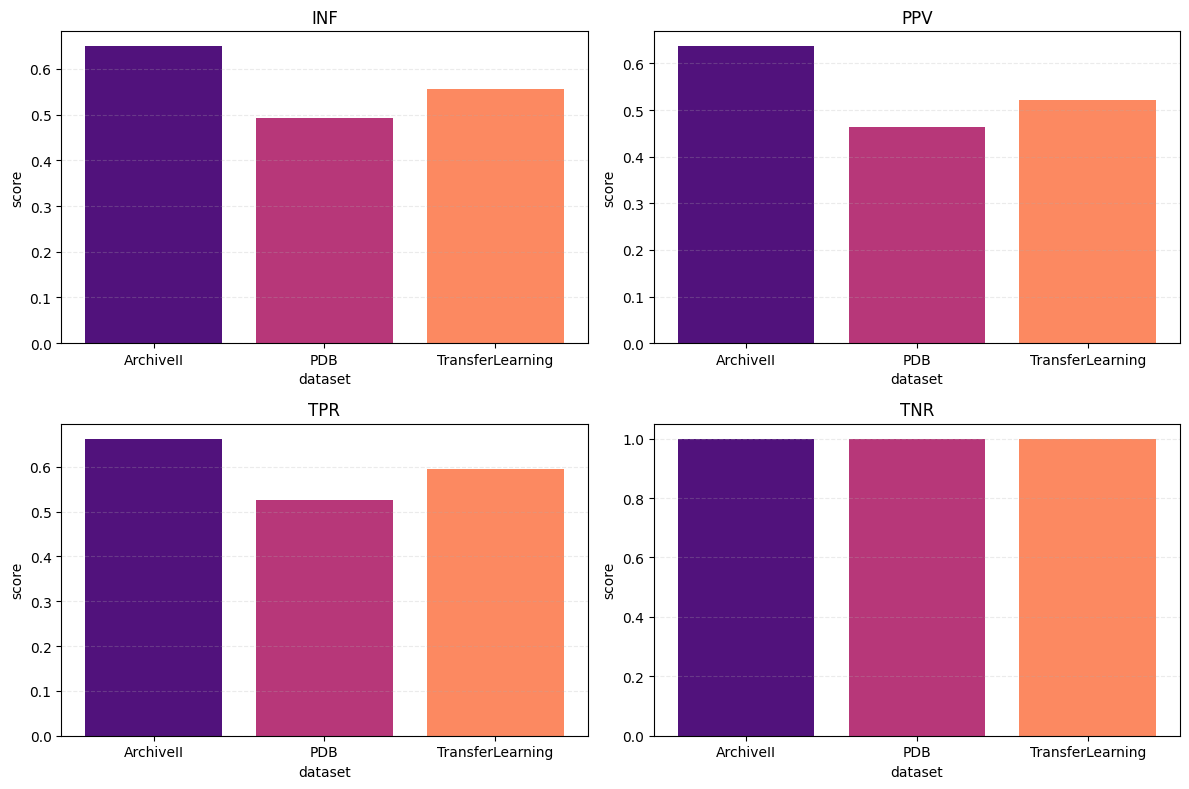

In [14]:
datasets = ("ArchiveII", "PDB", "TransferLearning")

plot_metrics(datasets)